---
title: "A 10% Per Capita Minimum Grant - A per capita study"
format:
  html:
    code-fold: true
    code-summary: "Show the code"
  docx: 
    fig-height: 11.6 in
---

- The model here applies a hypothetical per capita minimum grant constraint, set at 10%, to ensure that each jurisdiction receives at least this proportion of the funds if they were allocated on a per capita basis. 

- The per capita minimum for the benchmark scenario is set to 30%, as is the status quo.

In [1]:
import pandas as pd
from fagrants_module import fagrants
import seaborn as sns

inst = fagrants.fagrants_model(
    data_path="./Data/FA Grants Tables - Python.xlsx",
    per_capita_minimum=0.10,  # Set to 10% for this simulation
    per_capita_minimum_base=0.3,
)

sim_grants = inst.run()

sim_grants["Sim_i"] = sim_grants["UID"].str.split("_").str[1].astype(int)

for year in range(2025, 2029):
    sim_grants[f"Grant Delta_{year}"] = (
        sim_grants[f"Grant_{year}"] - sim_grants[f"Grant_base_{year}"]
    )

# sim_grants_udl = sim_grants[sim_grants["ACLG"] == "UDL"].copy()
def weighted_group_delta(grouped_df):
    return_dict = {}

    for year in range(2025, 2029):
        total_weight = grouped_df[f"ERP_{year}"].sum()

        return_dict[f"Population_{year}"] = total_weight

        weighted_mean = (
            grouped_df[f"Grant Delta_{year}"] * grouped_df[f"ERP_{year}"]
        ).sum() / total_weight

        return_dict[f"Grant Delta_{year}"] = weighted_mean

    return pd.Series(return_dict)

In [2]:
def grants_plot(sub_df, col: str = "State-ACLG", var: str = "Expected Change in GPG Per Capita($)"):

    if "ACLG" in sub_df.columns:
        aclg = list(sub_df["ACLG"].unique())

        chunks = [aclg[i:i+4] for i in range(0, len(aclg), 4)]

        filt = "ACLG"
    
    else:
        chunks = [sub_df["Jurisdiction"].unique()]
        filt = "Jurisdiction"

    for chunk in chunks:
        sub_df_chunk = sub_df[sub_df[filt].isin(chunk)]

        g = sns.FacetGrid(
            sub_df_chunk,
            col=col,
            #x="Year",
            #y="Expected Change in GPG ($)",
            # kind="line",
            col_wrap=2,
            # legend="auto",
            sharex=False,
            sharey=False,
            aspect=(1 + 5**0.5) / 2,
            despine=True,
            height=4,
        )

        g.map_dataframe(
            sns.boxplot,
            x="Year",
            y=var,
            #errorbar="ci",
            #marker="o",
            #dashes=False,
            #legend=False,
            #zorder=5,
            #err_style="band",
            color="#062E4A"
        )

        #for ax in g.axes.flat:
        #    title = ax.get_title()
        #    ax.text(0.9, 1, title.split(" - ")[-1], transform=ax.transAxes, fontweight="bold")
        #    ax.set_title("")
        #    ax.set_xticks([2025, 2026, 2027, 2028])
        #    ax.set_xticklabels(["2025-26", "2026-27", "2027-28", "2028-29"])

    return

In [3]:
sim_grants_grouped = (
    sim_grants.groupby(["ACLG", "Sim_i"])
    .apply(weighted_group_delta, include_groups=False)
    .reset_index()
)

for year in range(2025, 2029):
    sim_grants_grouped[f"Grant Delta Per Capita_{year}"] = sim_grants_grouped[f"Grant Delta_{year}"]/ sim_grants_grouped[f"Population_{year}"]

sim_grants_melted = pd.melt(
    sim_grants_grouped,
    id_vars=["ACLG", "Sim_i"],
    value_vars=[f"Grant Delta Per Capita_{year}" for year in range(2025, 2029)],
    var_name="Year",
    value_name="Expected Change in GPG Per Capita($)",
)

sim_grants_melted["Year"] = sim_grants_melted["Year"].str.split("_").str[1].astype(int)
#sim_grants_melted["State-ACLG"] = (
#    sim_grants_melted["Jurisdiction"] + " - " + sim_grants_melted["ACLG"]
#)

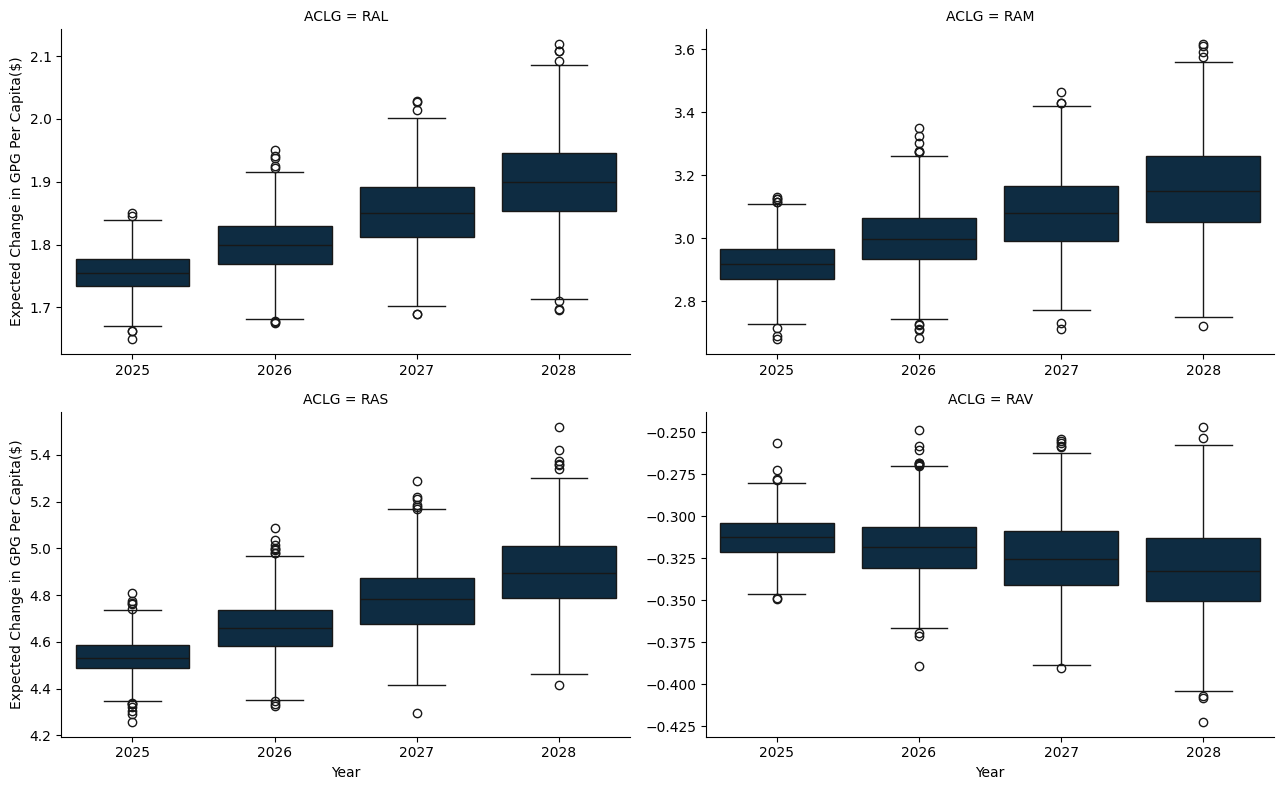

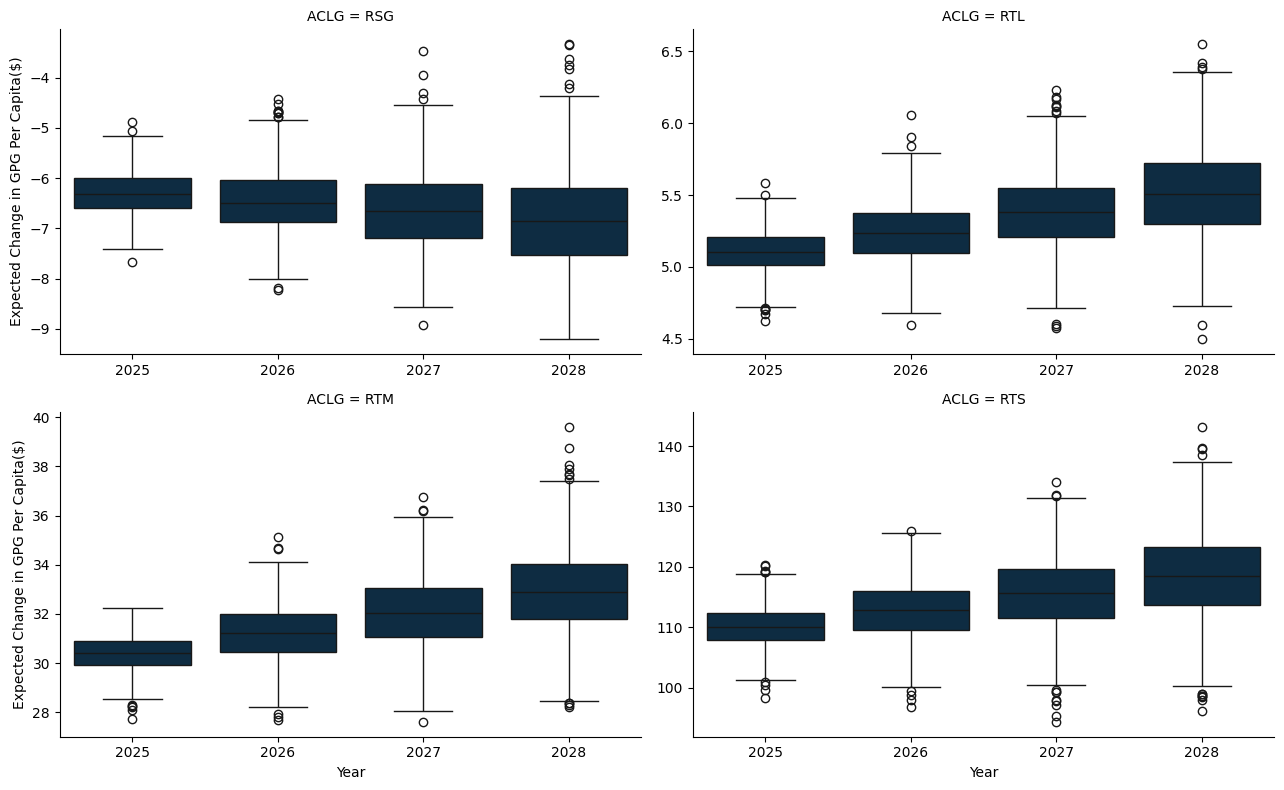

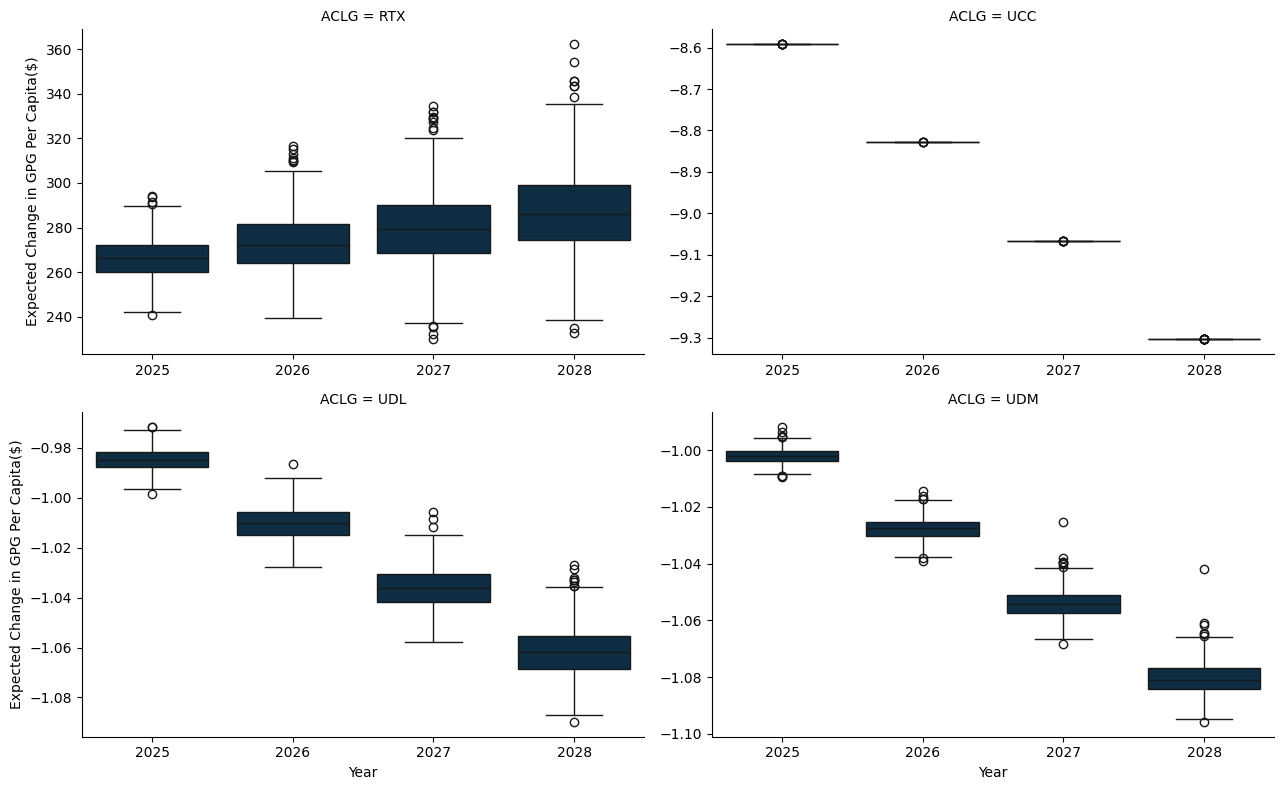

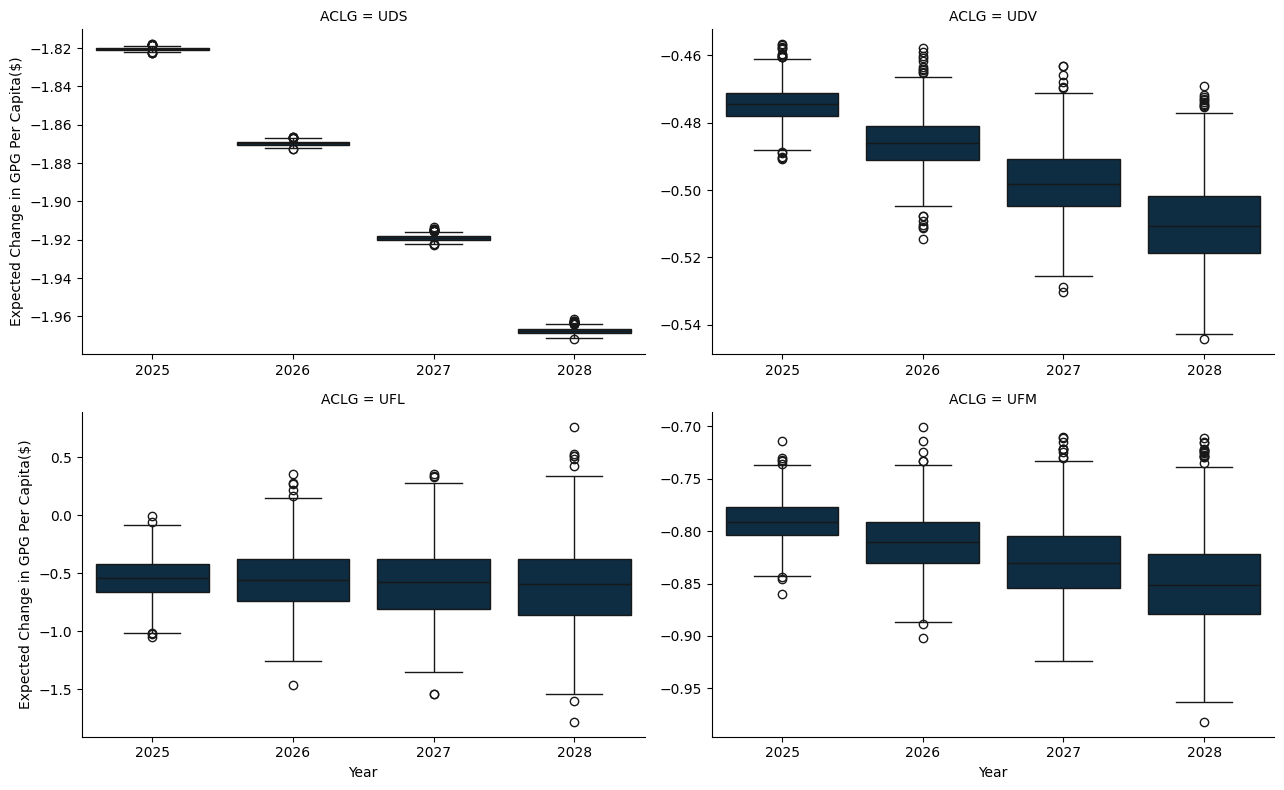

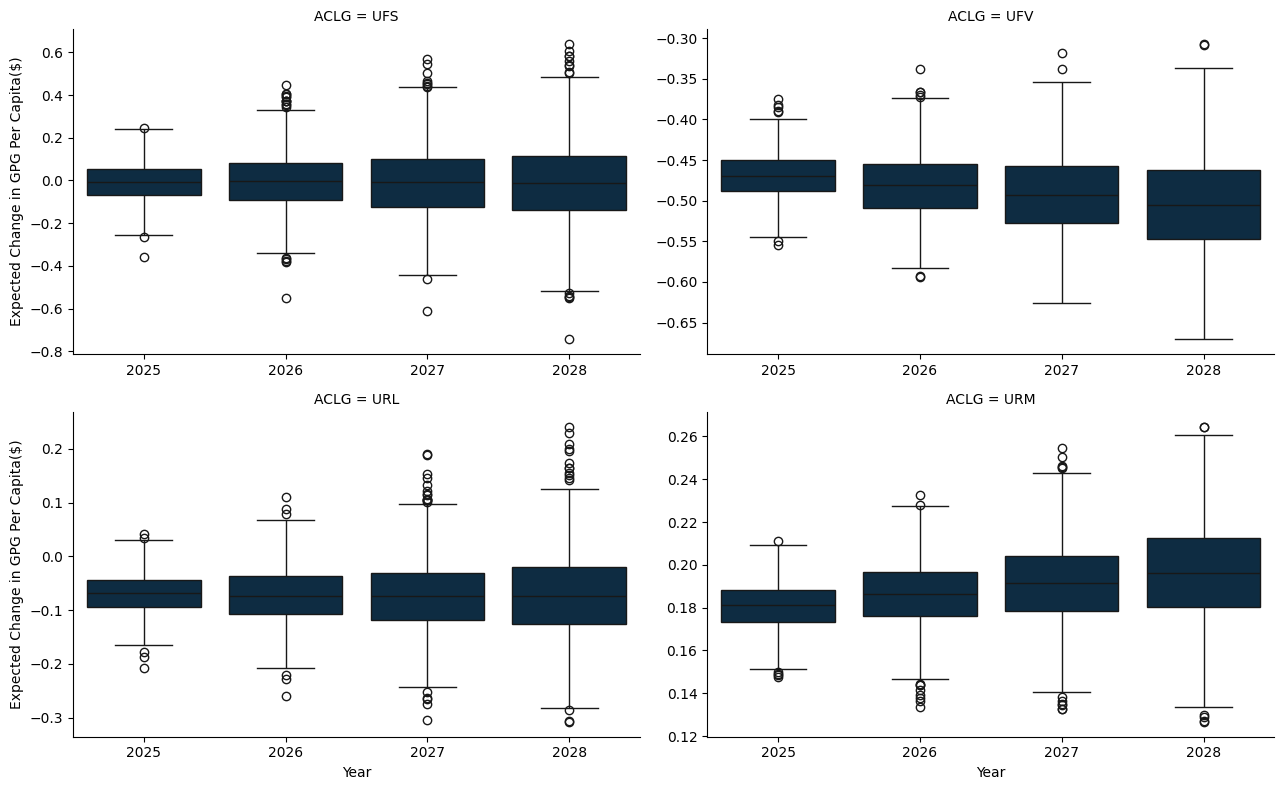

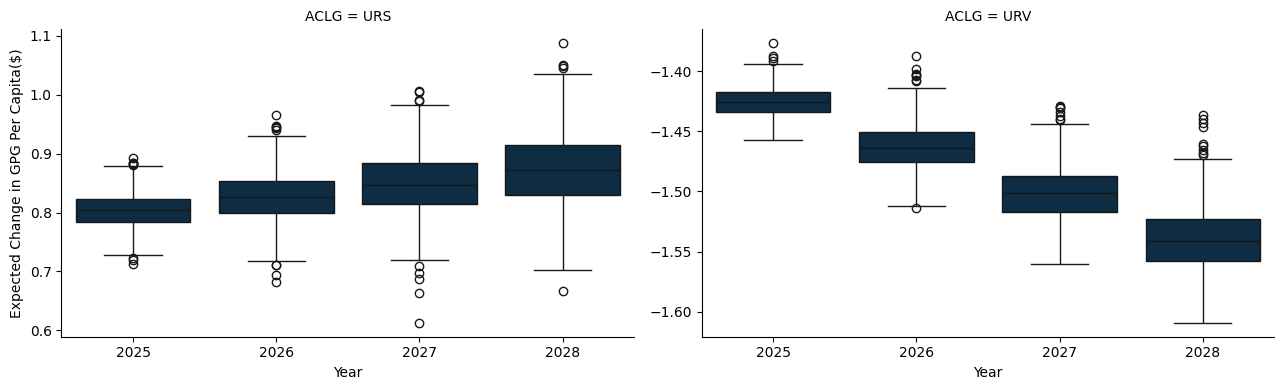

In [4]:
grants_plot(sim_grants_melted, col="ACLG")

## A State and Territory breakdown

In [5]:
sim_grants_grouped = (
    sim_grants.groupby(["Jurisdiction", "ACLG", "Sim_i"])
    .apply(weighted_group_delta, include_groups=False)
    .reset_index()
)

for year in range(2025, 2029):
    sim_grants_grouped[f"Grant Delta Per Capita_{year}"] = sim_grants_grouped[f"Grant Delta_{year}"]/ sim_grants_grouped[f"Population_{year}"]

sim_grants_melted = pd.melt(
    sim_grants_grouped,
    id_vars=["Jurisdiction", "ACLG", "Sim_i"],
    value_vars=[f"Grant Delta Per Capita_{year}" for year in range(2025, 2029)],
    var_name="Year",
    value_name="Expected Change in GPG Per Capita($)",
)

sim_grants_melted["Year"] = sim_grants_melted["Year"].str.split("_").str[1].astype(int)
sim_grants_melted["State-ACLG"] = (
    sim_grants_melted["Jurisdiction"] + " - " + sim_grants_melted["ACLG"]
)

### New South Wales

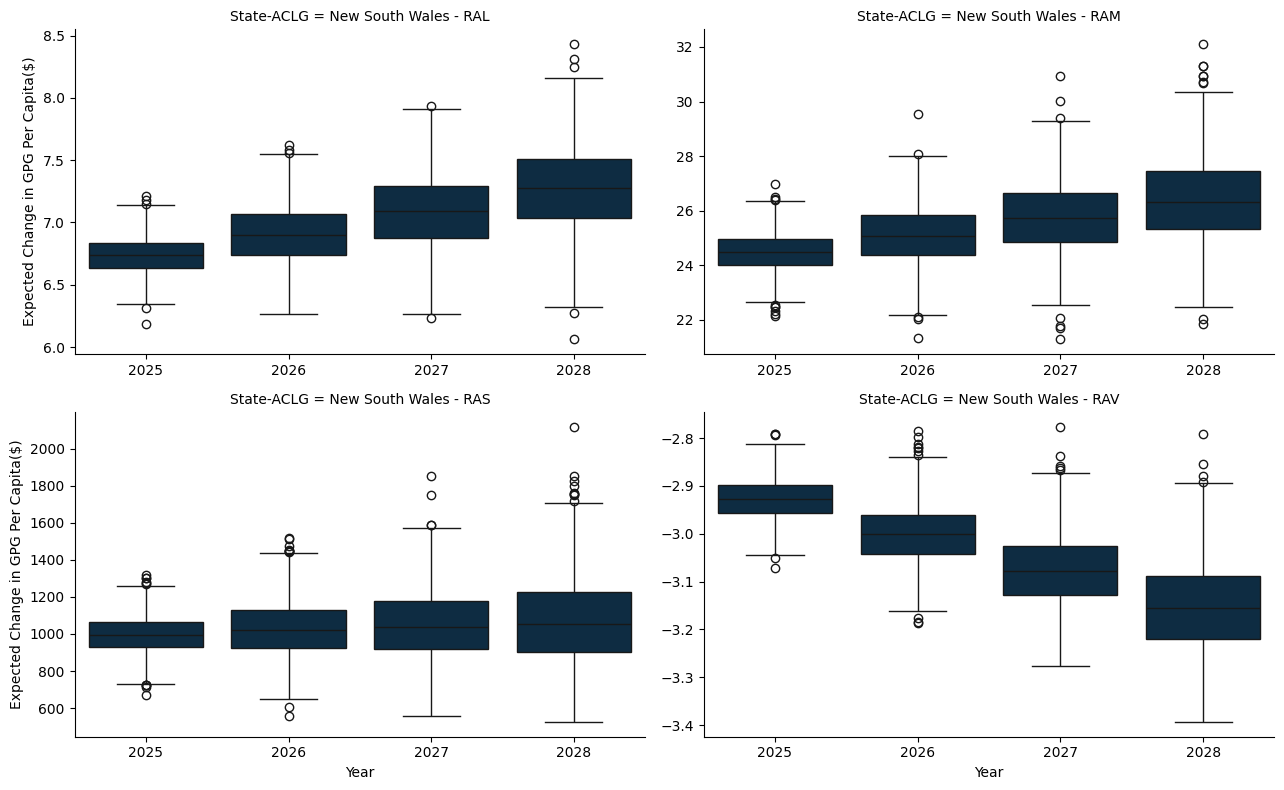

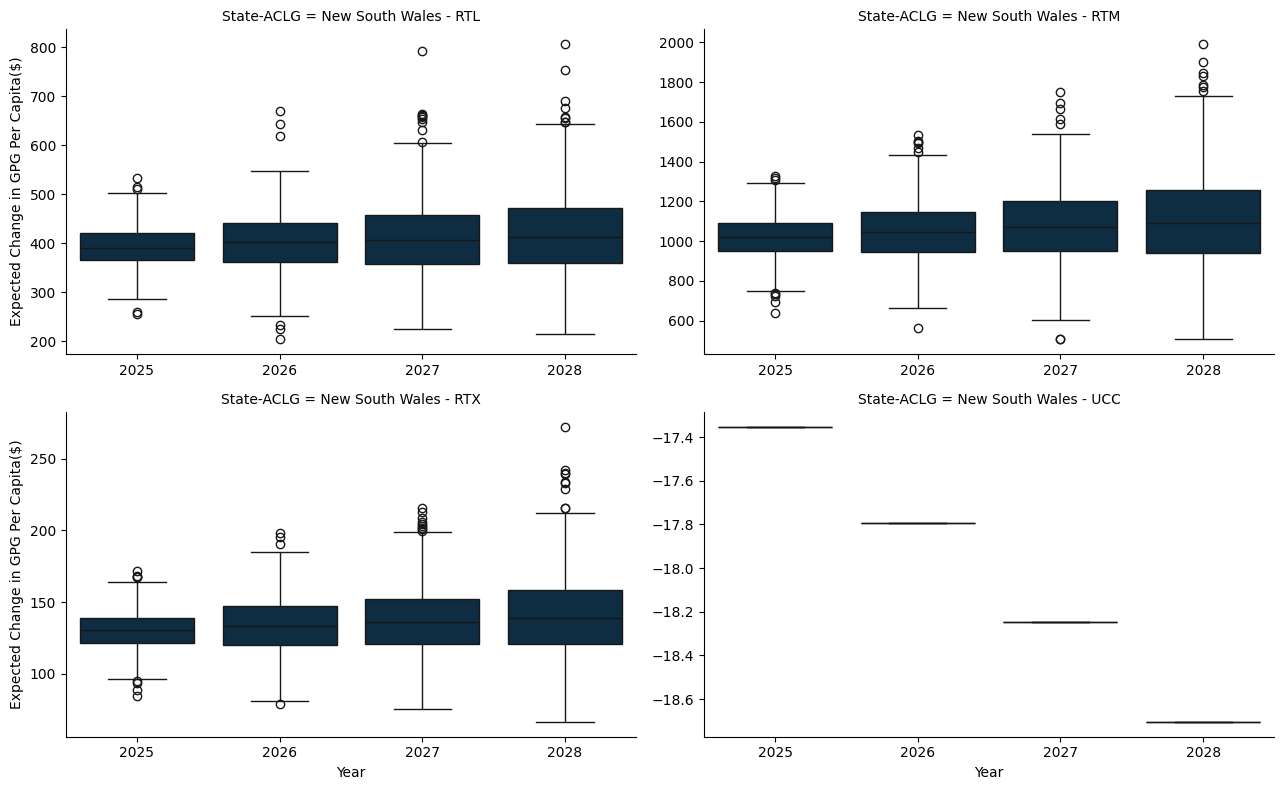

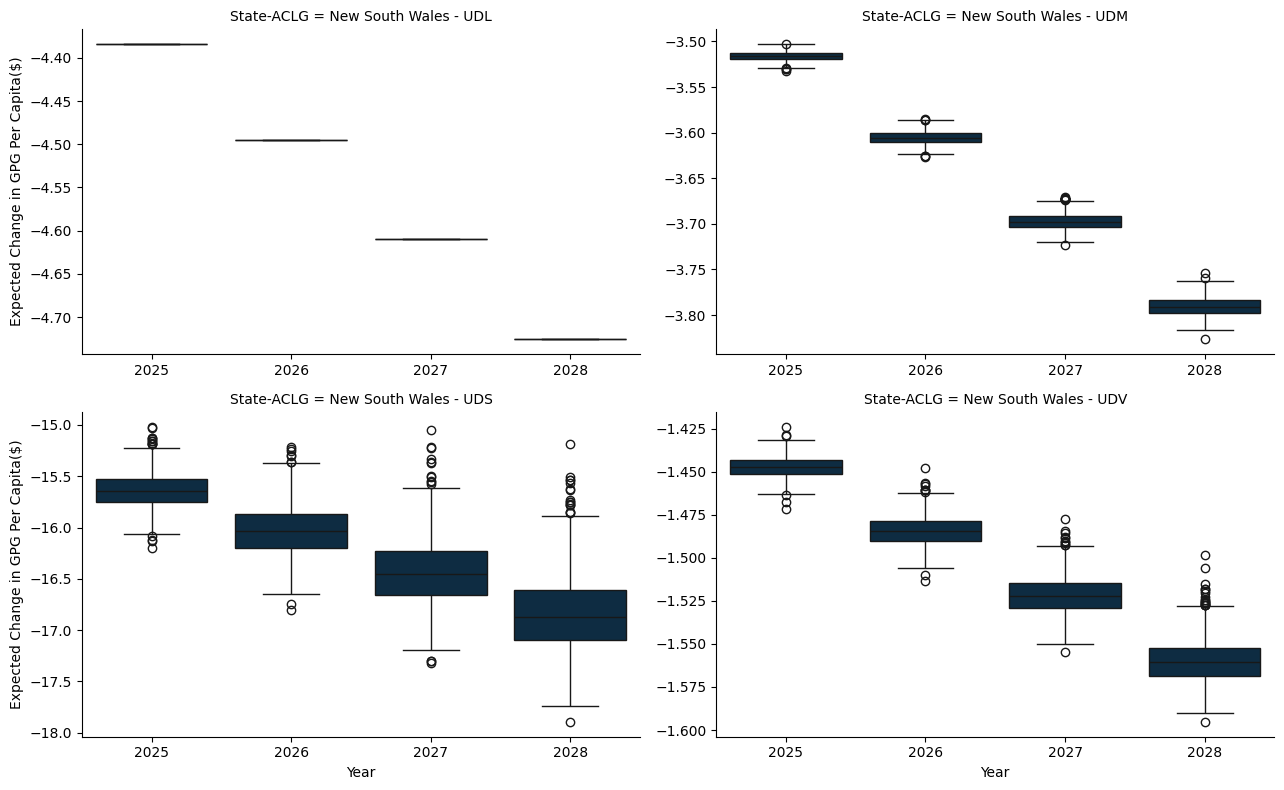

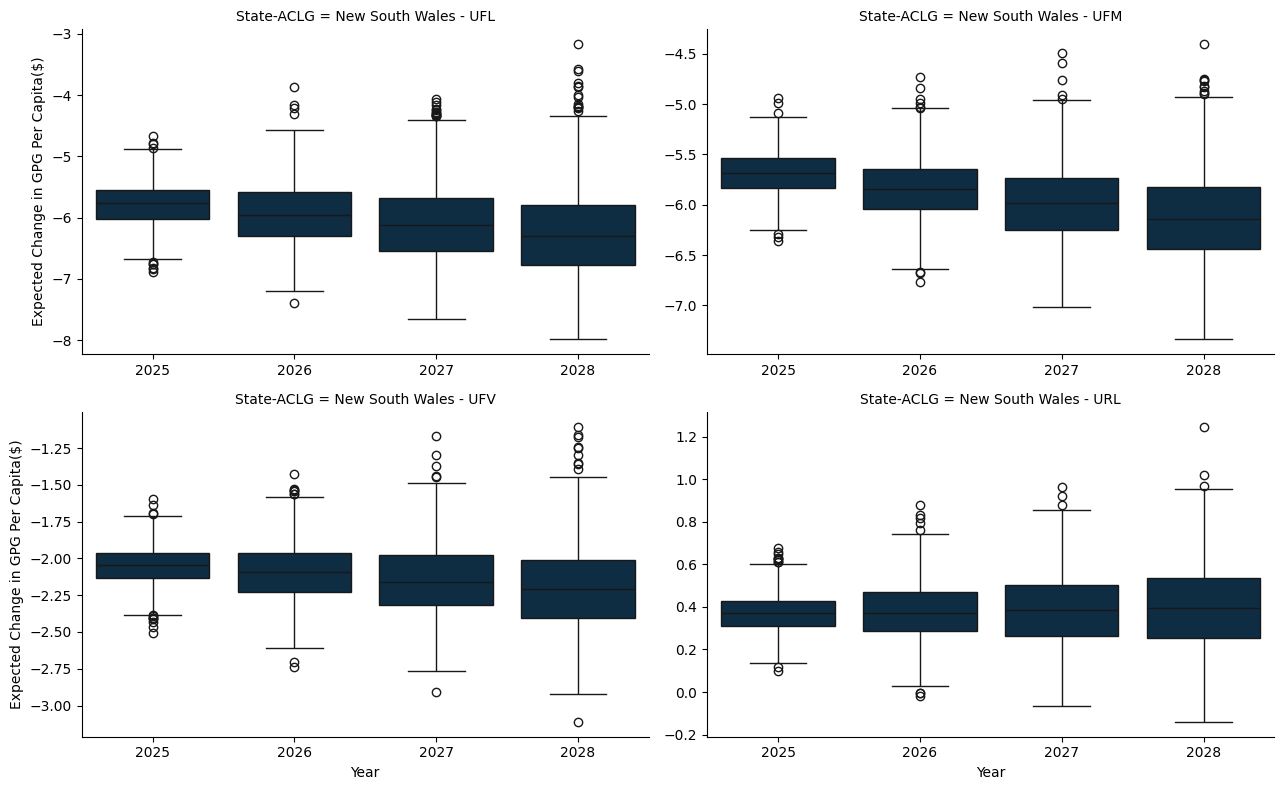

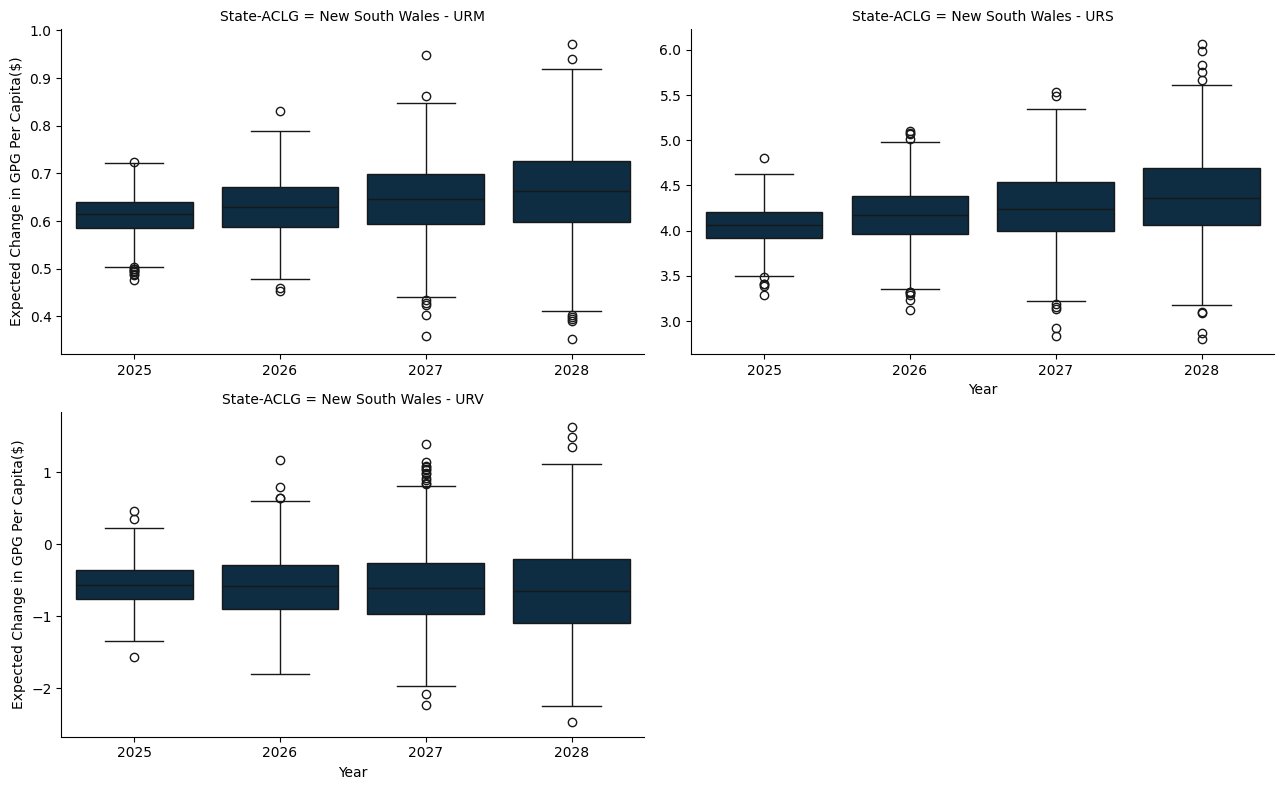

In [6]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "New South Wales"])

### Victoria

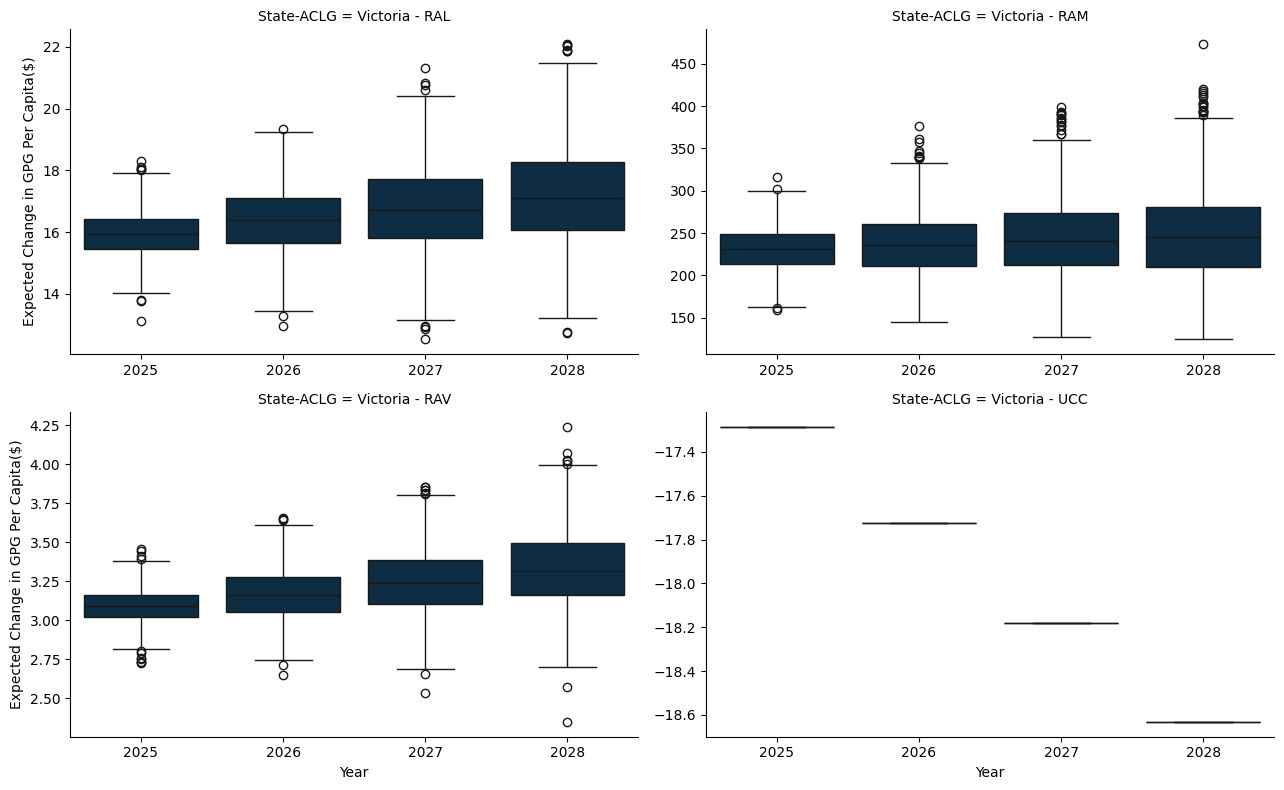

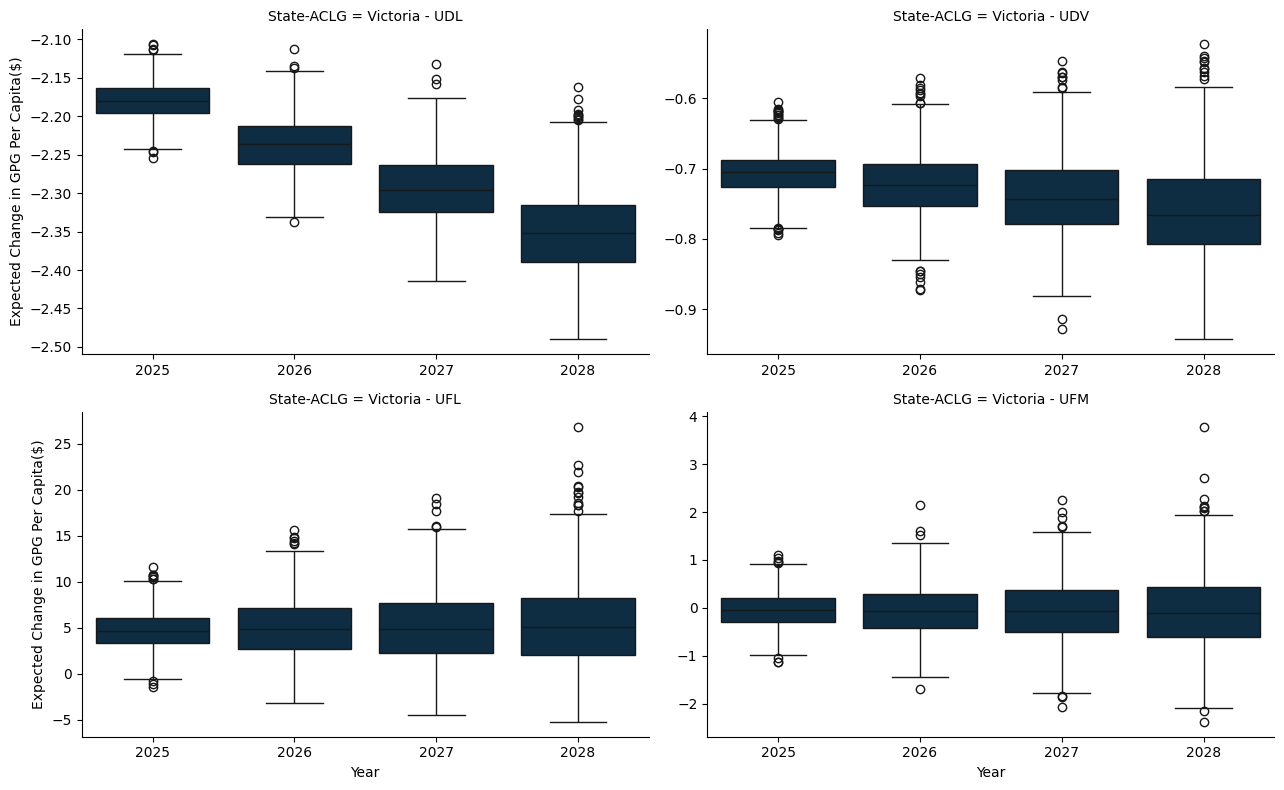

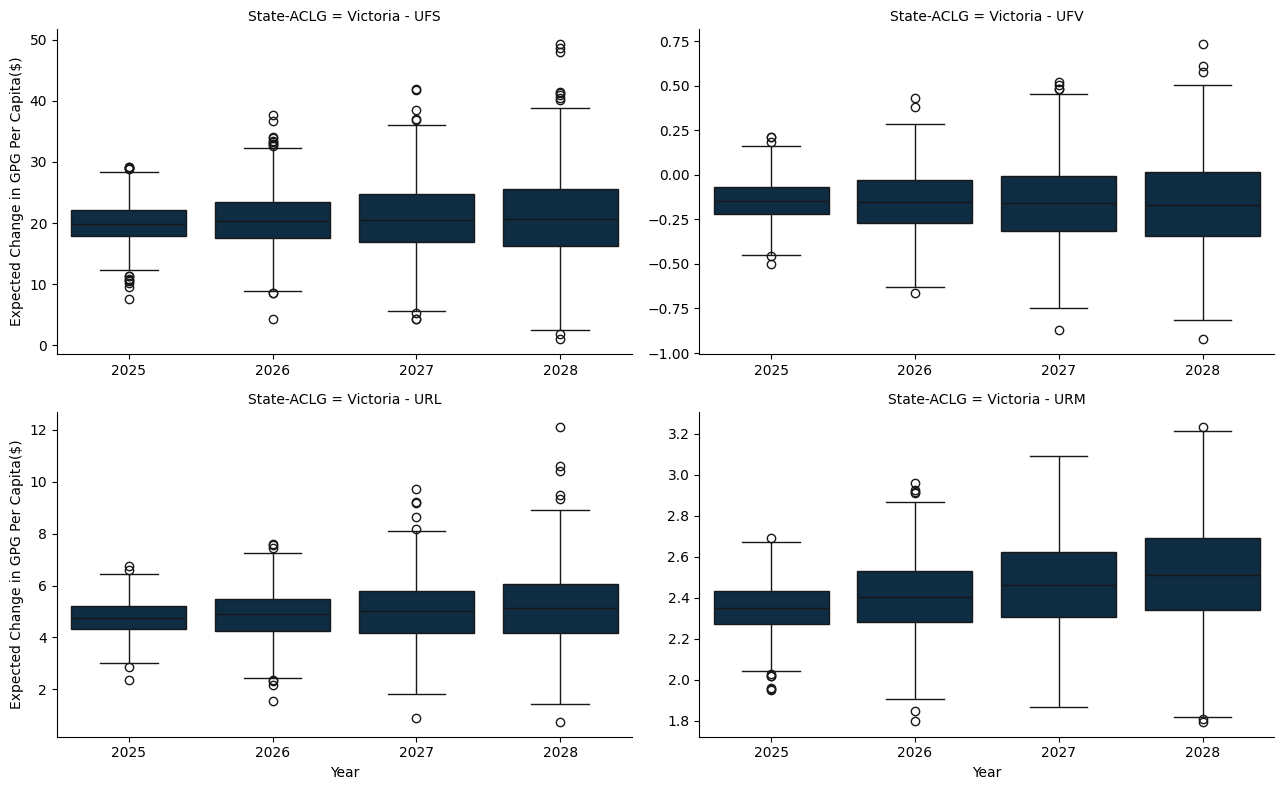

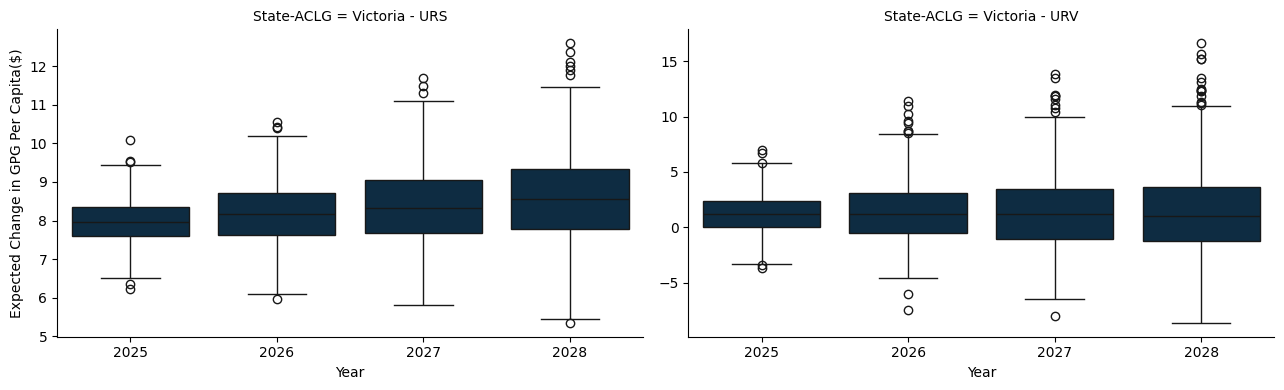

In [7]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Victoria"])

### Queensland

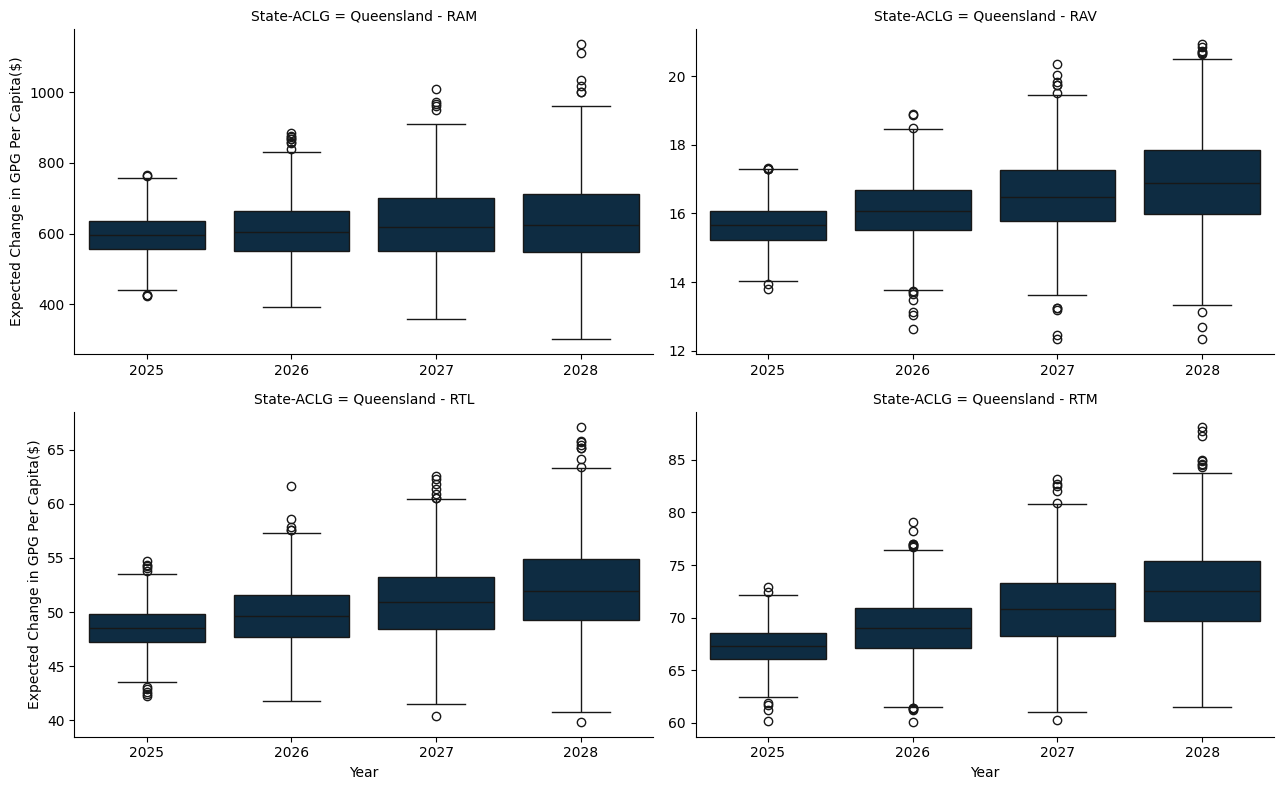

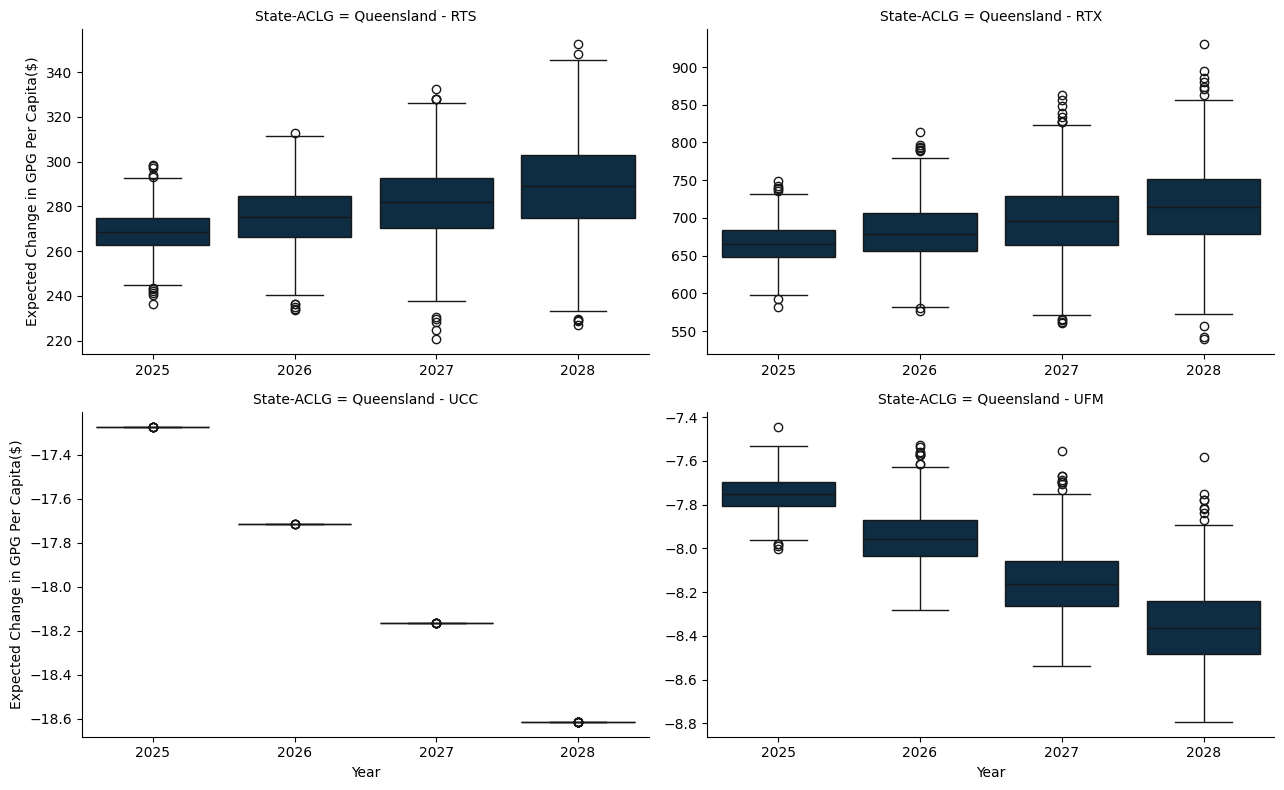

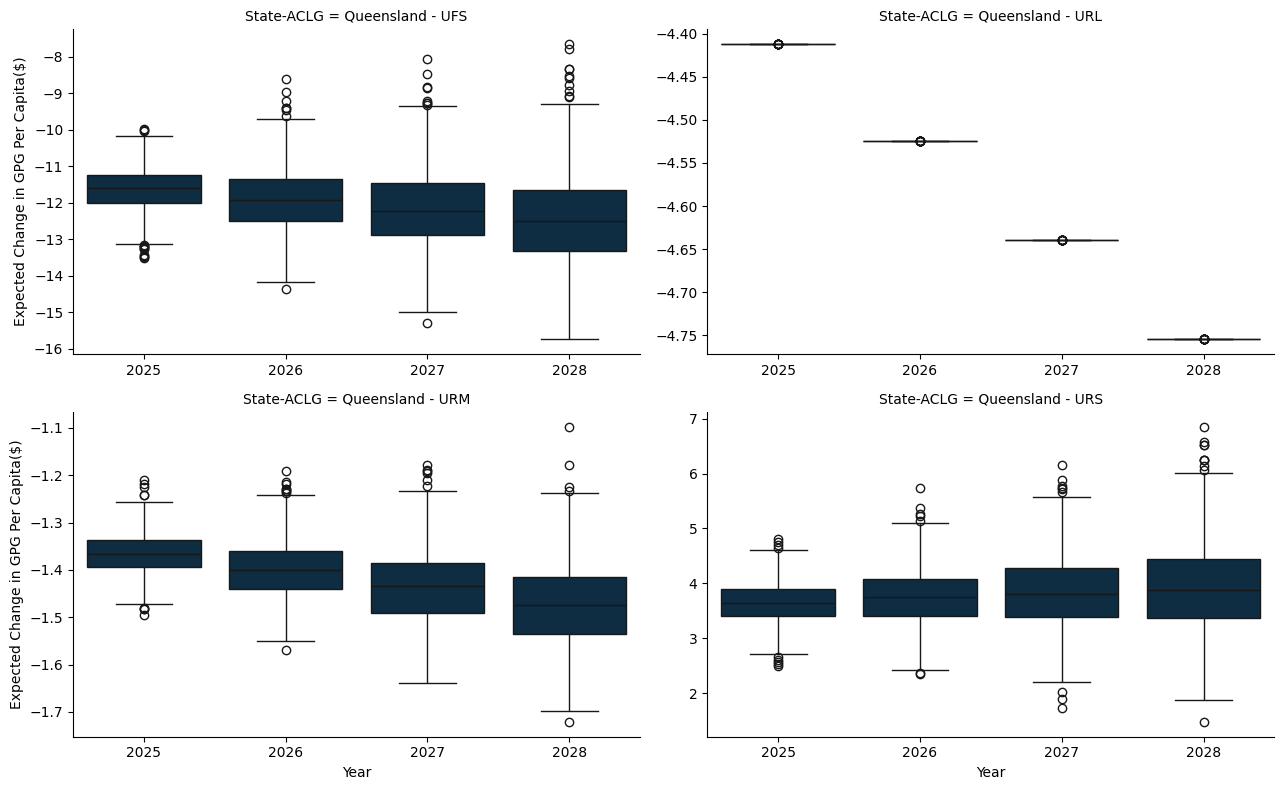

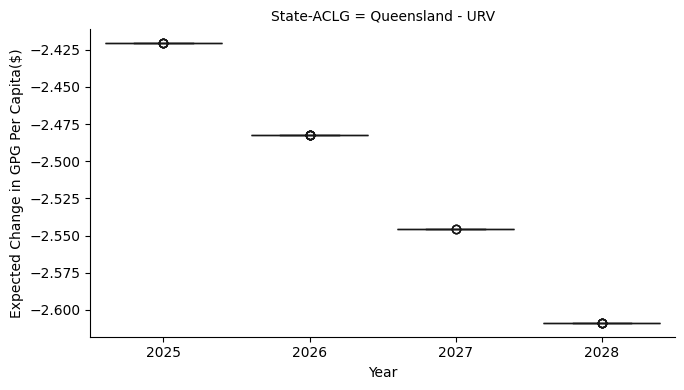

In [8]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Queensland"])

### South Austrlalia

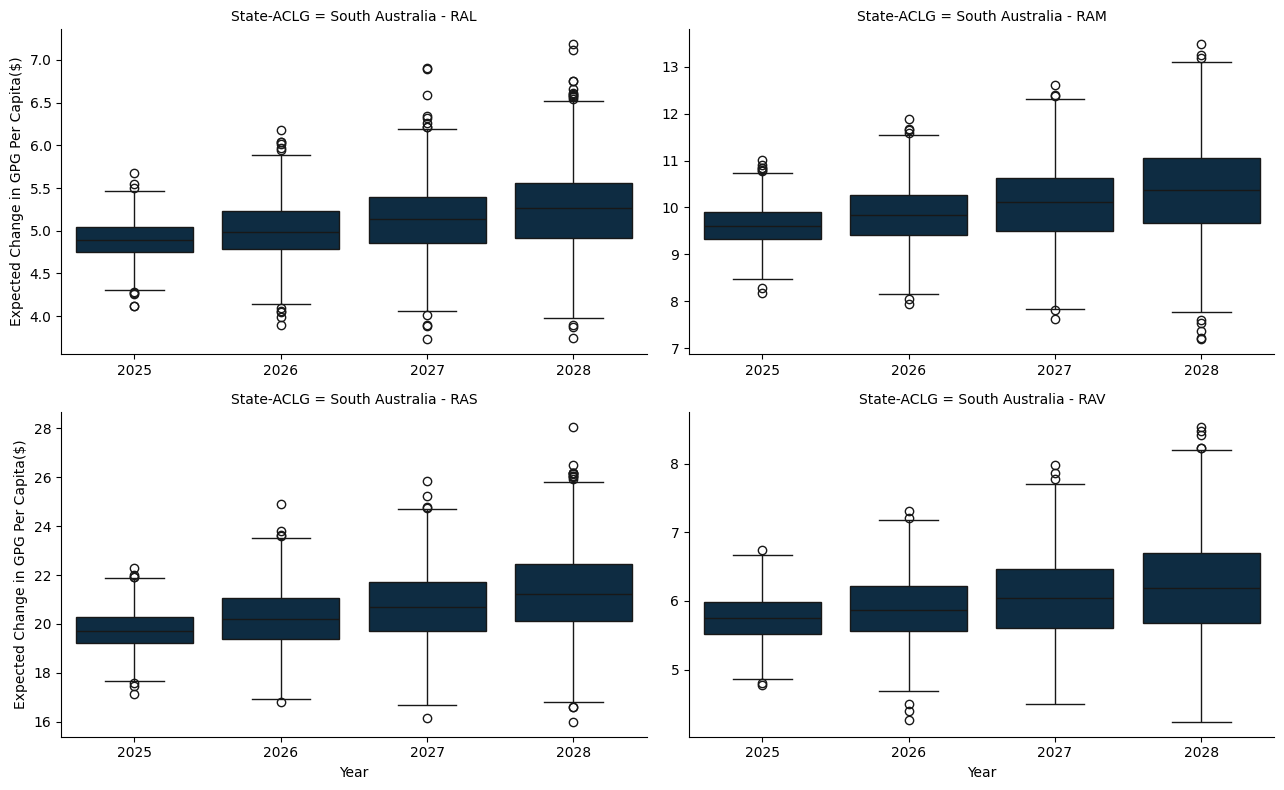

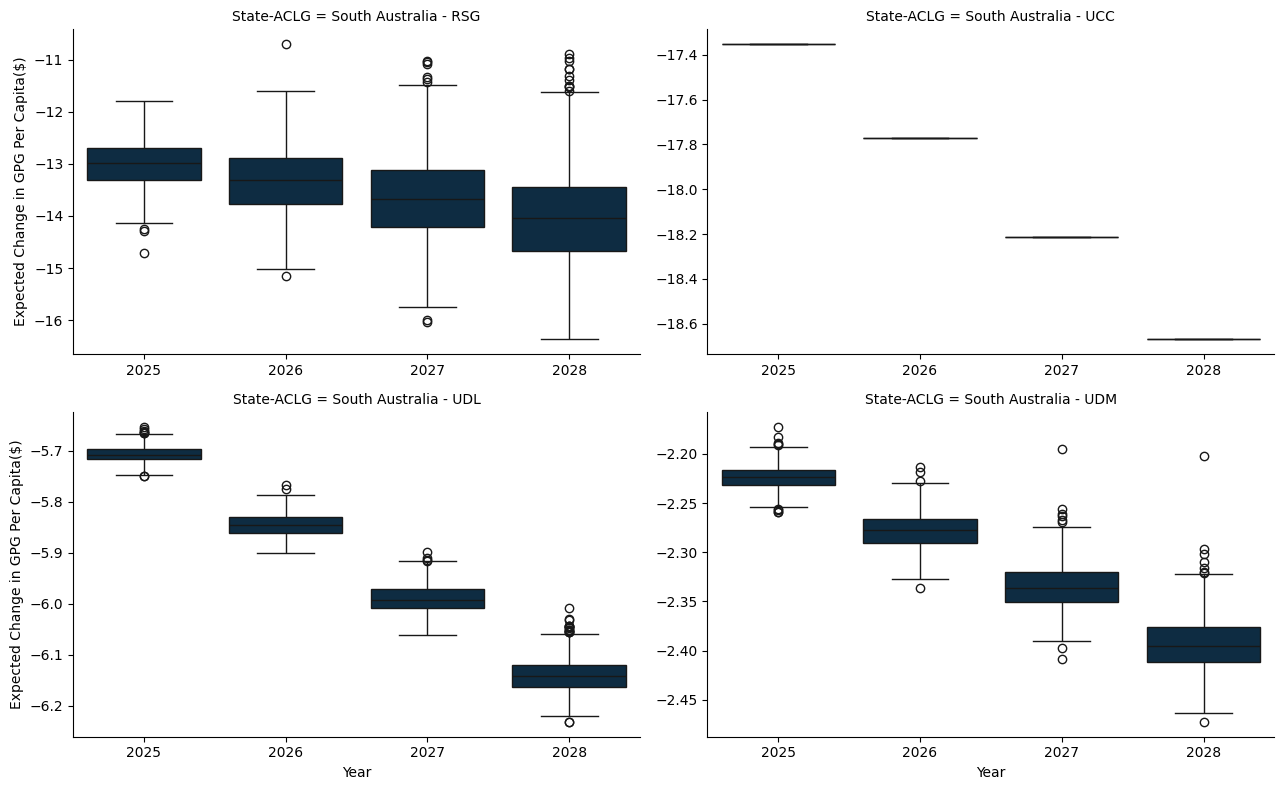

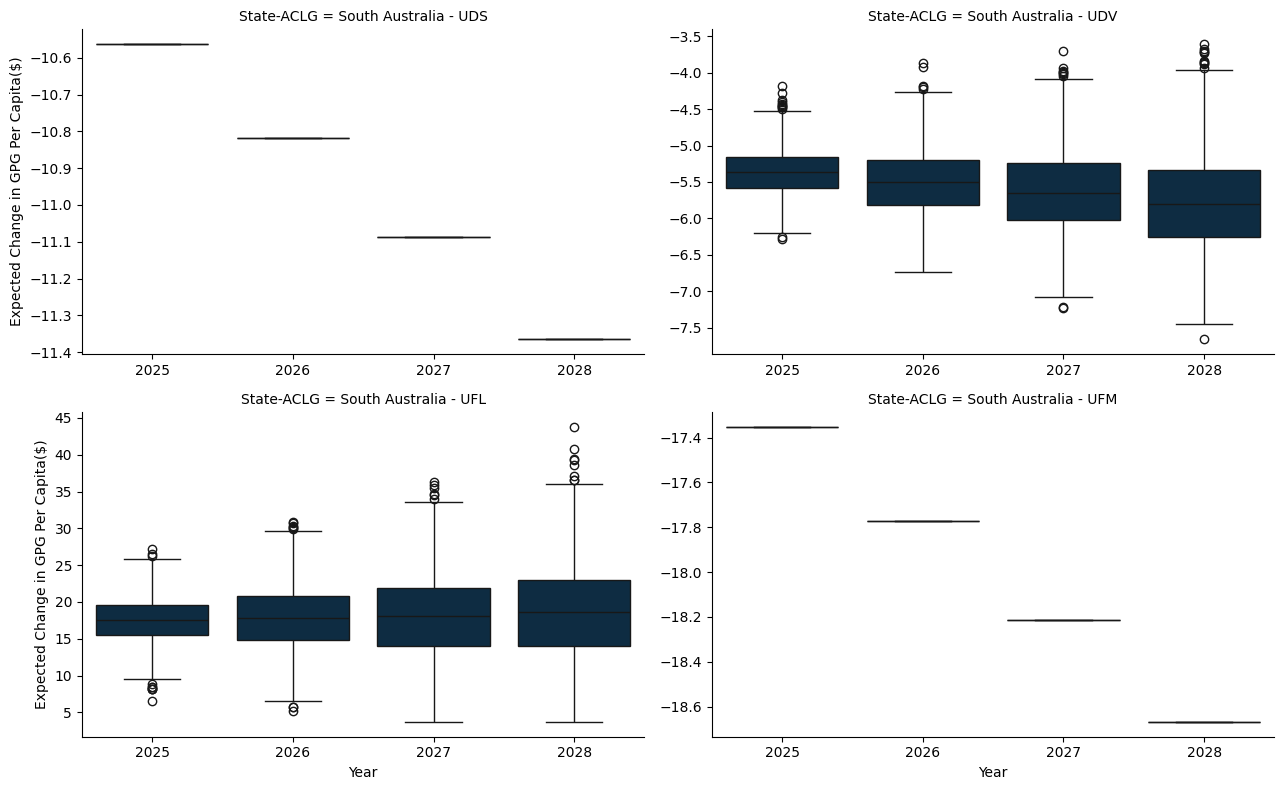

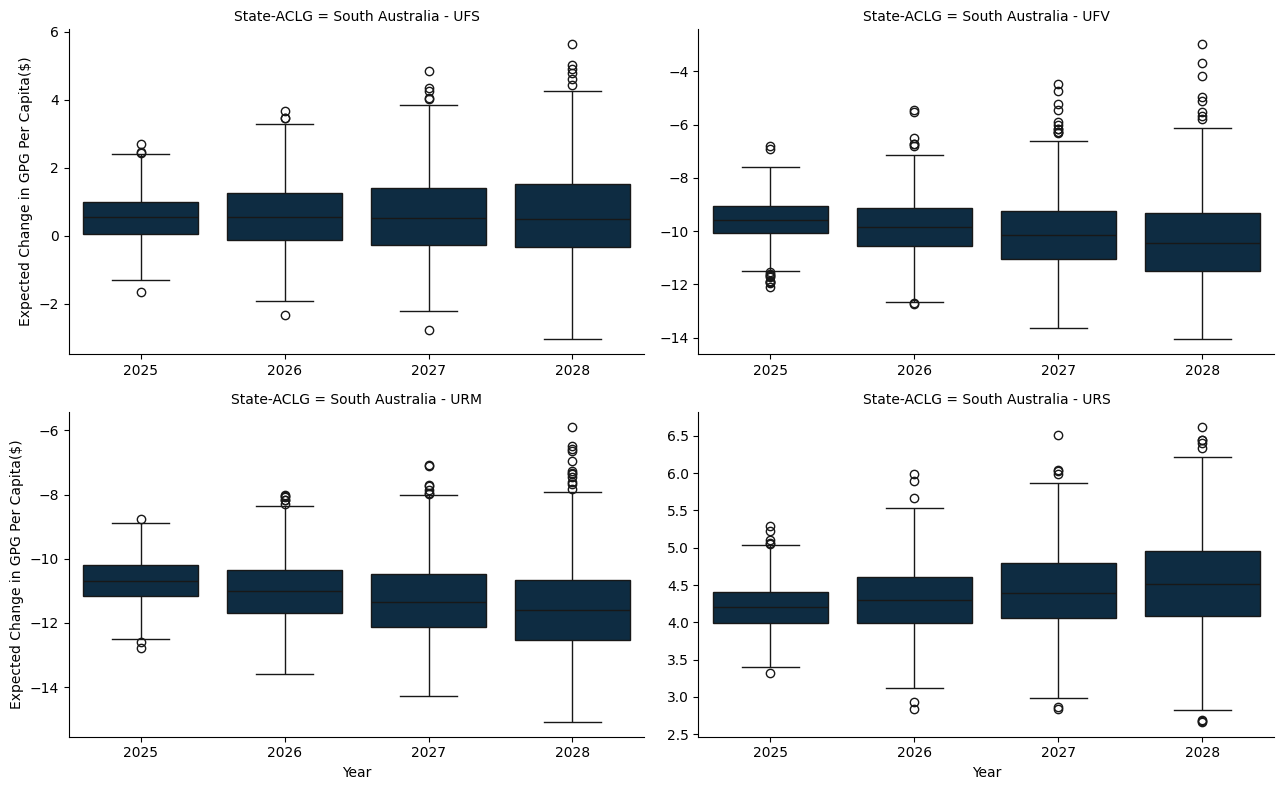

In [9]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "South Australia"])

### Western Australia

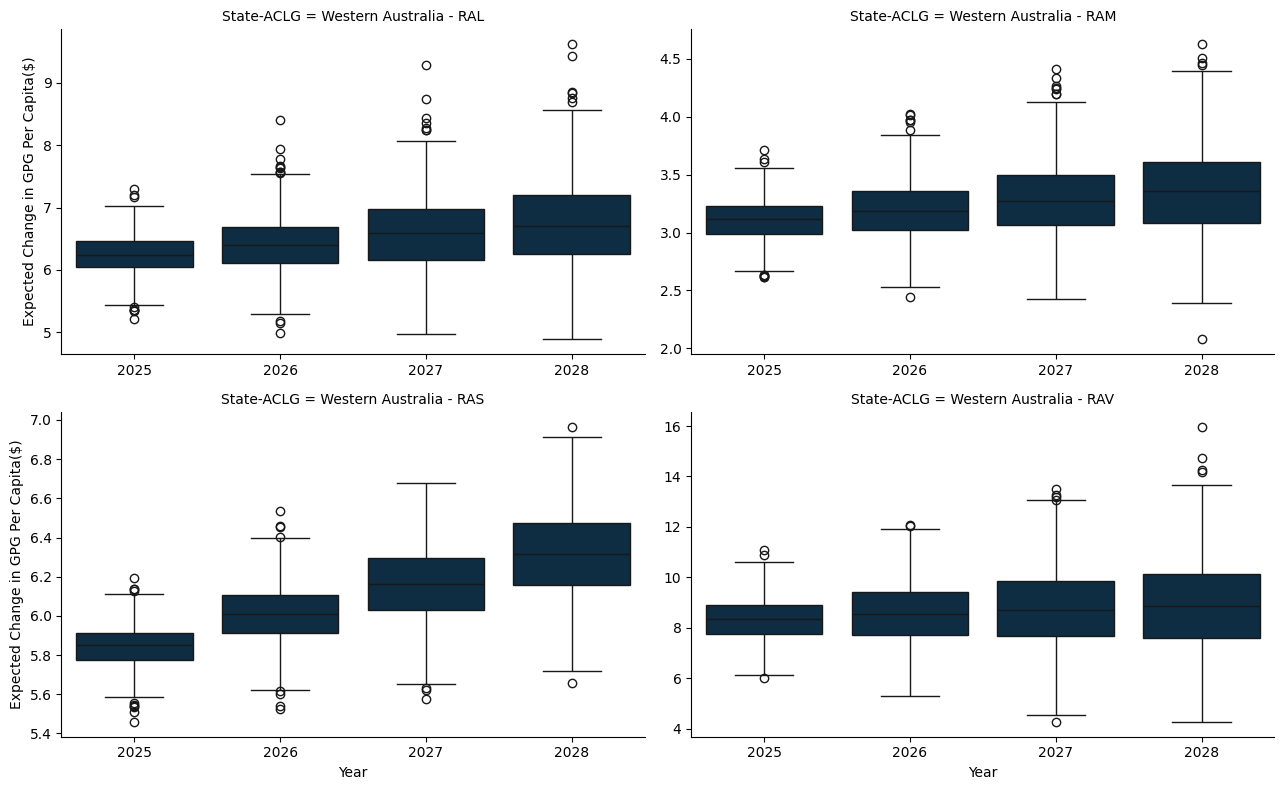

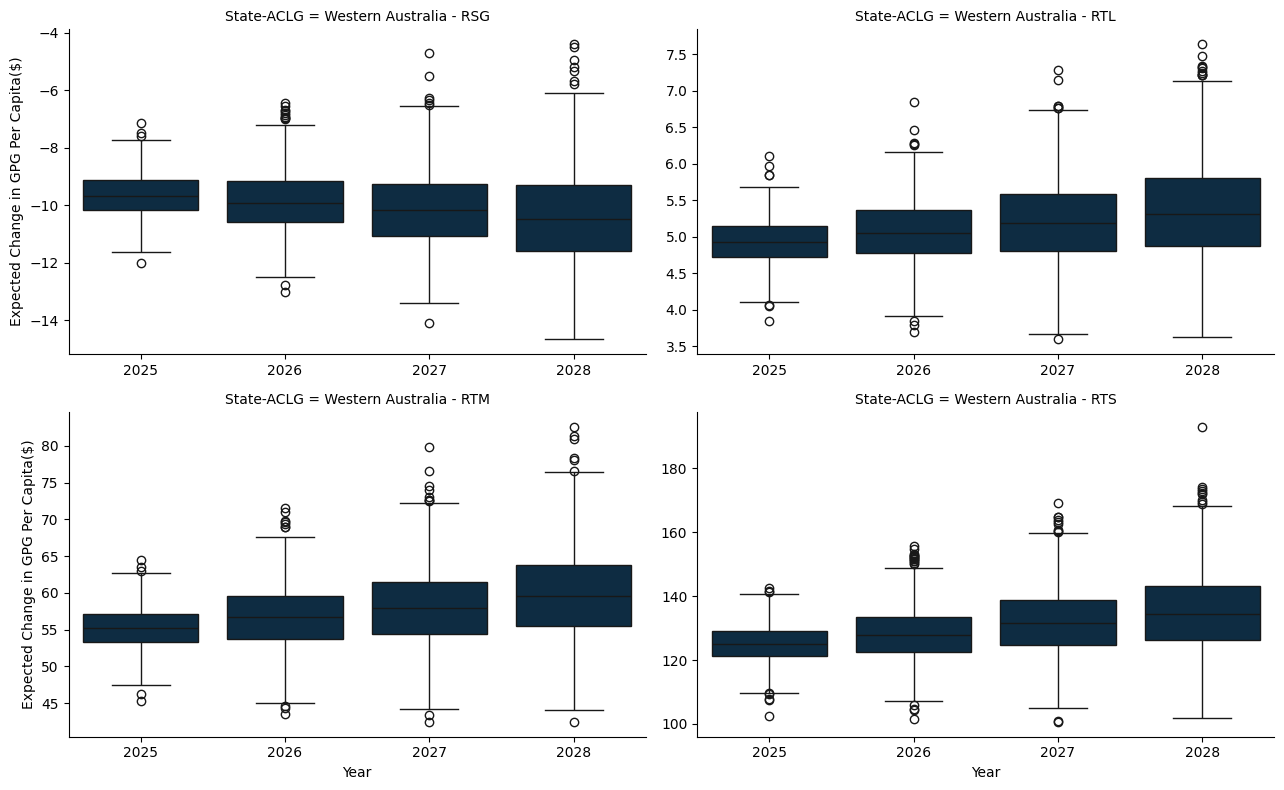

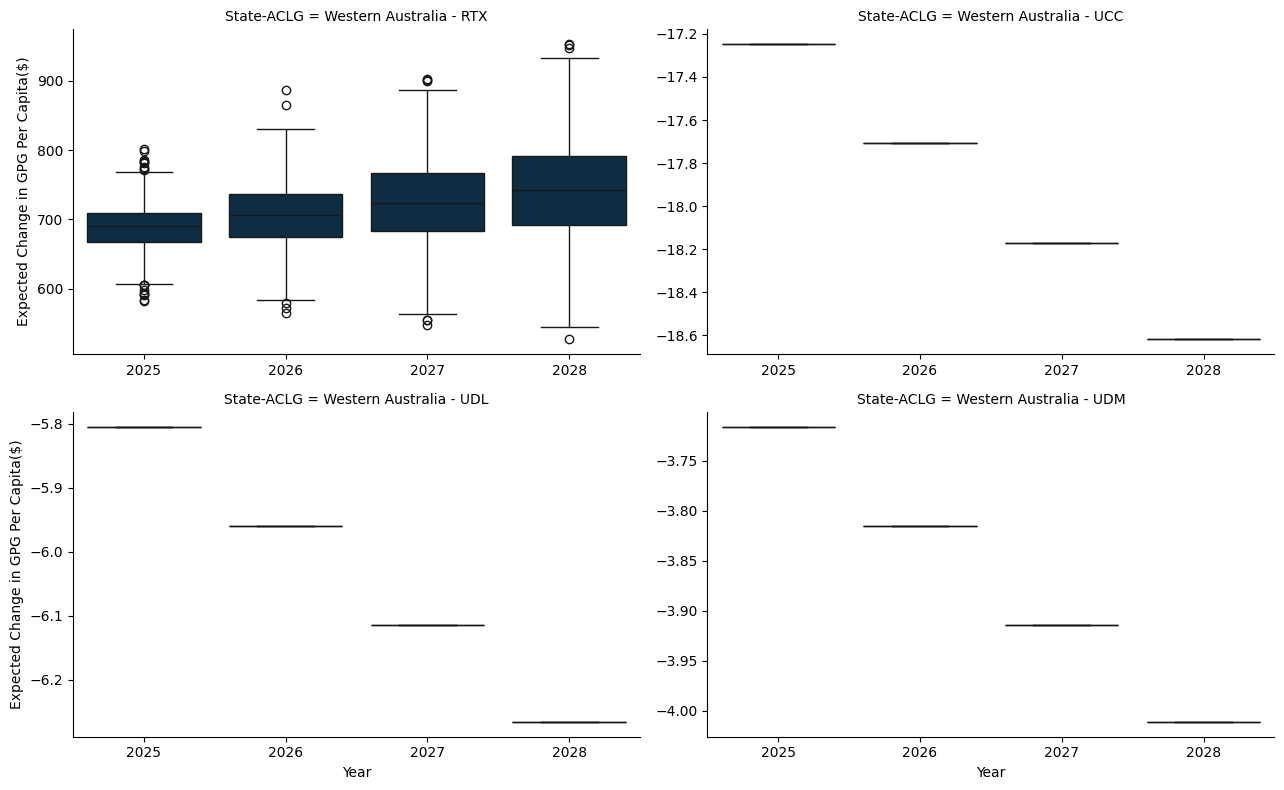

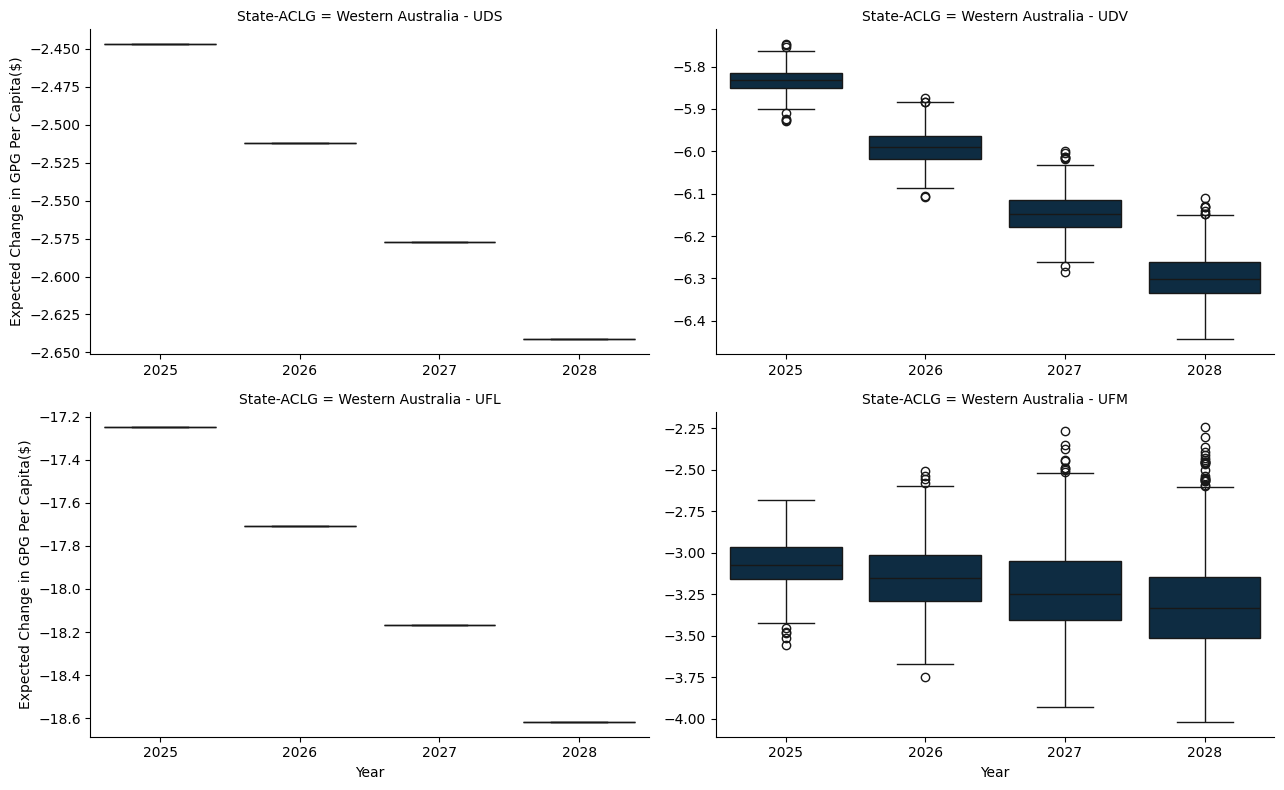

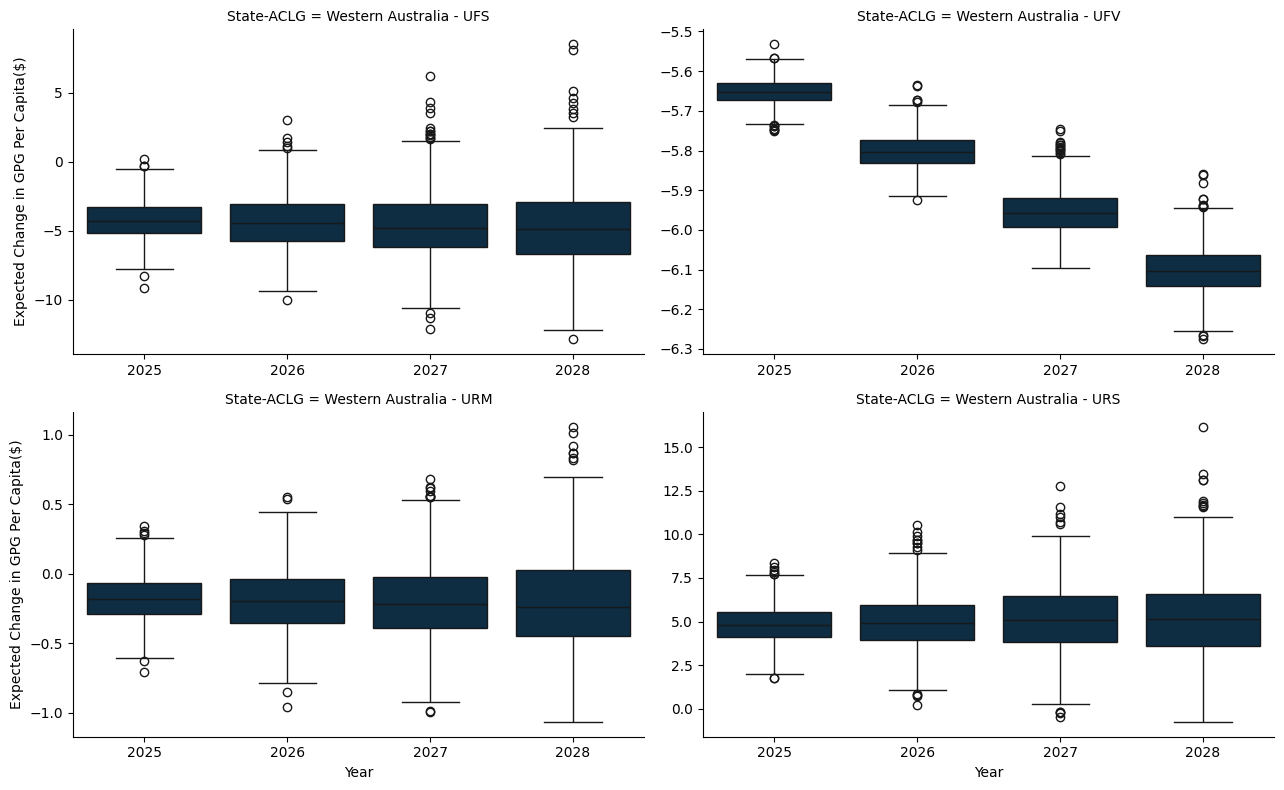

In [10]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Western Australia"])

### Tasmania

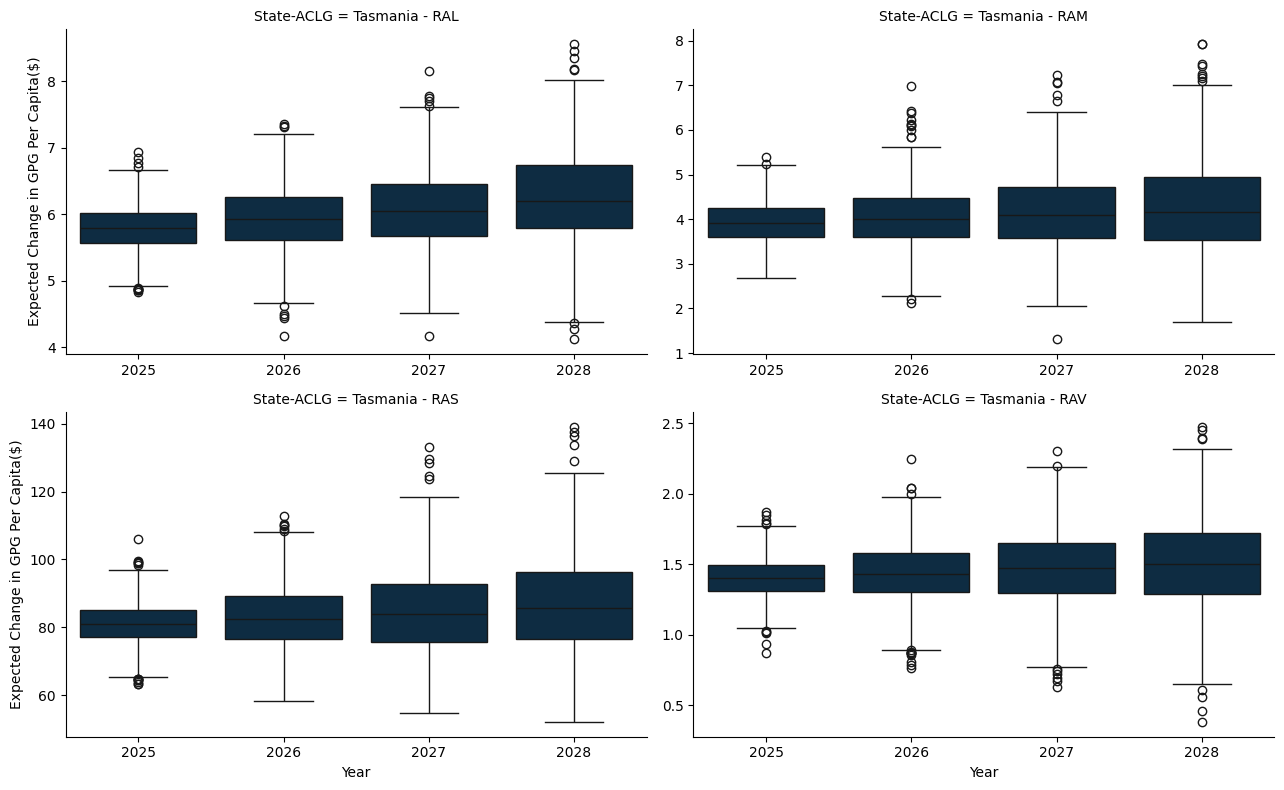

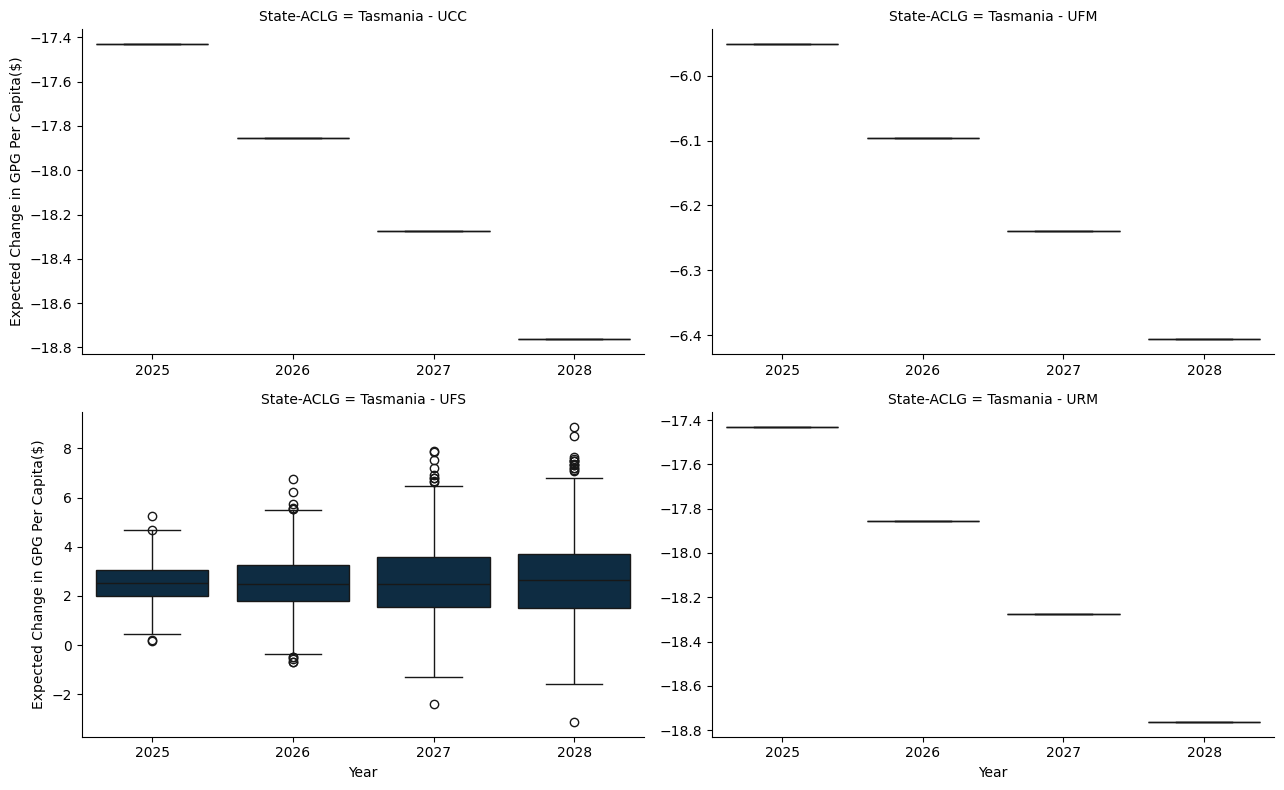

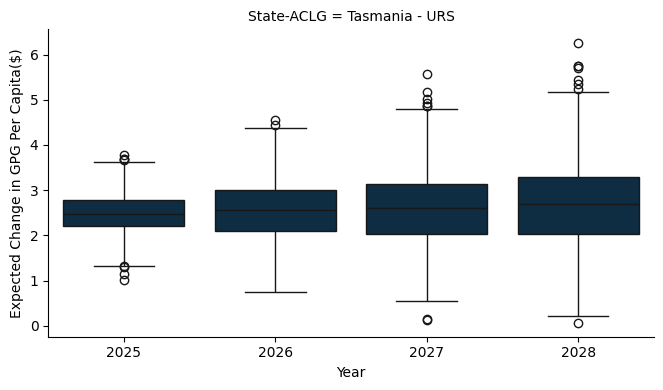

In [11]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Tasmania"])

### Northern Territory

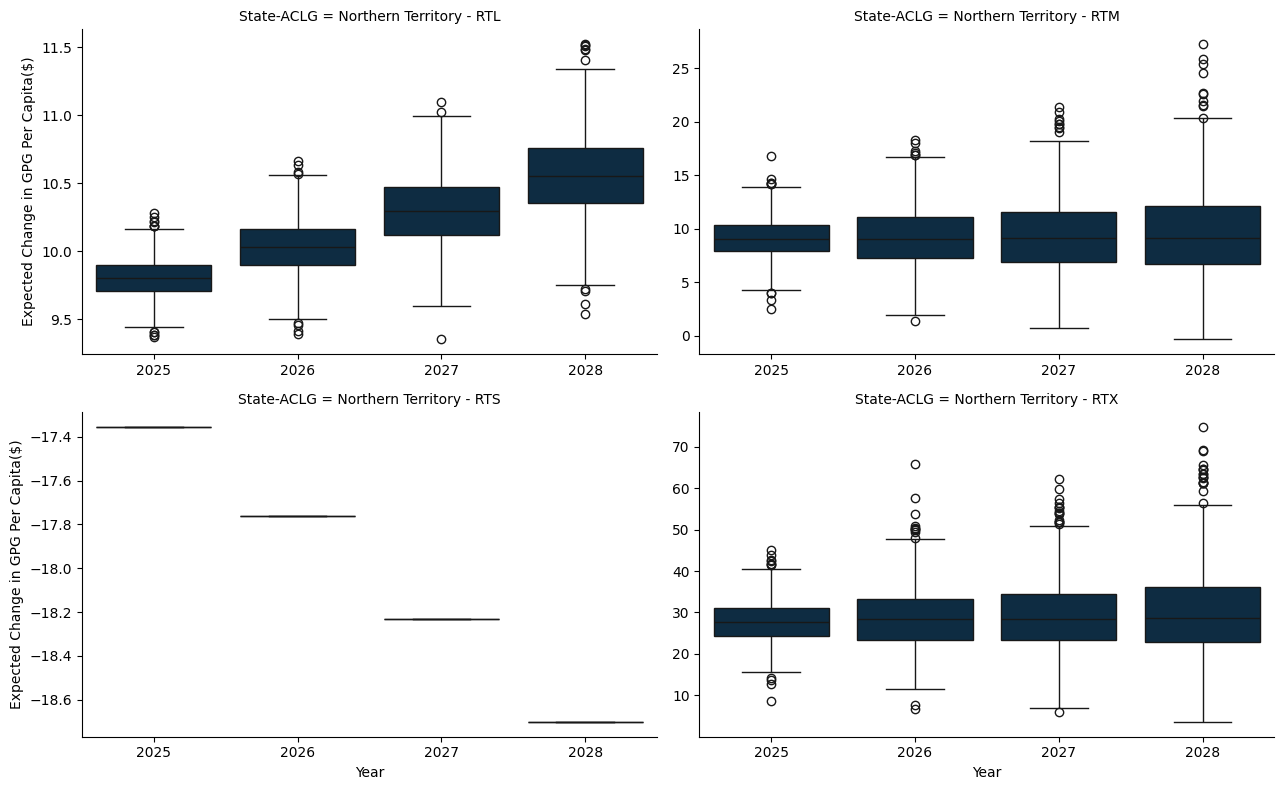

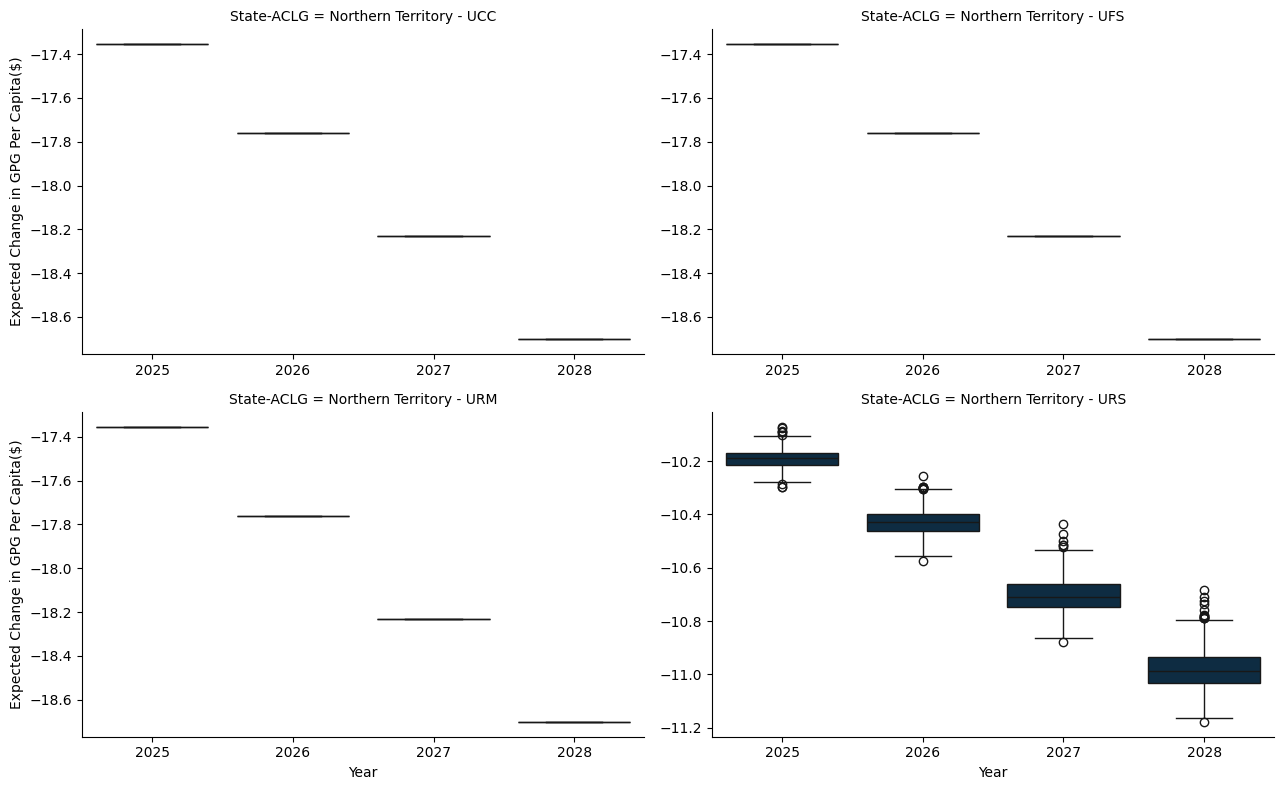

In [12]:
grants_plot(sim_grants_melted[sim_grants_melted["Jurisdiction"] == "Northern Territory"])